<a href="https://colab.research.google.com/github/AfifNurraihan/Data_Sains_Kelas_Mahir/blob/main/AfifNurraihan_1800015022_TugasB4P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assalamualaikum Warahmatullahi Wabarakatuh

Kesempatan kali ini saya akan berbagi note seputar KNN dan NB semampunya, 

**Let's Go !!!!!!!!!!!!!!!**


#**Import Library**

In [1]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#**Mengakses Dataset**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AfifNurraihan/Data_Sains_Kelas_Mahir/main/heart.csv',sep=",")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##**Tujuan Analisis Data**
Melakukan klasifikasi pasien berdasarkan Jenis Kelamin pada kasus ini

Feature dalam dataset sebagai berikut :
age = usia dalam tahun

sex = (1 = laki-laki; 0 = perempuan)

cp = tipe nyeri dada

trestbps = tekanan darah istirahat (dalam mm Hg saat masuk ke rumah sakit)

chol = serum kolestoral dalam mg / dl

fbs = (gula darah puasa> 120 mg / dl) (1 = true; 0 = false)

restecg = hasil elektrokardiografi istirahat

thalach = detak jantung maksimum tercapai

exang = angina yang diinduksi oleh olahraga (1 = ya; 0 = tidak)

oldpeak = depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat

slope = kemiringan segmen ST latihan puncak

ca = jumlah pembuluh besar (0-3) diwarnai dengan tepung

thal = 3 = normal; 6 = cacat tetap; 7 = cacat yang dapat dibalik

target = memiliki penyakit atau tidak (1 = ya, 0 = tidak)

#**EDA & Data Preprocessing**

###Check Dimensi

In [3]:
#Melihat ukuran Data 
df.shape 

(303, 14)

Jumlah kolom 14 dengan jumlah baris 303

###Tipe Data

In [4]:
#Melihat tipe data
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
#Melihat informasi lengkap terkait data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


Terlihat bahwa semua kolom bertipe integer dan hanya kolom oldpeak yang bertipe float

### Mengecek Missing Value

In [6]:
#Mengecek jumlah nilai yang hilang pada setiap kolom
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Karena output diatas menunjukan angka '0' pada setiap kolom data. Maka, tidak di temukan ada nilai yang hilang.

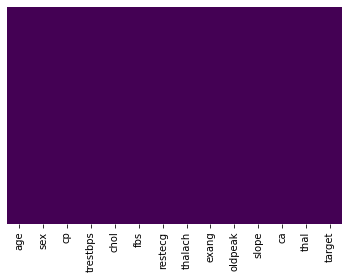

In [7]:
#Plot missing value
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Plot diatas tidak menunjukan adanya nilai yang hilang pada setiap kolom data

###Statistik Data

In [8]:
#Mengecek statistik data
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Normalisasi Data


In [9]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


#**Pemodelan KNN (From Scratch & Scikit Learn)**

**Model K-Nearest Neighbours**

*Ide Dasar :*

***Mengklasifikasikan sebuah data ke dalam sebuah kelas didasarkan pada tetangga terdekatnya***

*Algoritma KNN :*

Klasifikasi dengan algoritma KNN dilakukan dengan langkah-langkah berikut:

1. Menghitung jarak antara data uji dan masing-masing data latih
2. Mengurutkan jarak dari terdekat hingga terjauh
3. Mengambil sejumlah k teratas dari vektor jarak(Tetangga)
4. Mengambil kelas yang paling sering muncul pada baris yang dipilih
5. Memilih kelas dari data prediksi

###Perhitungan From Scratch

In [10]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [11]:
# Normalisasi
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [12]:
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.21, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
#Menyimpan data uji dan data latih kedalam bentuk vektor 
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [14]:
# Mendefinisikan jarak Euclidean
def jarak_euclidean(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [15]:
# Klasifikasi KNN untuk satu data uji
def knn(x_train, x_test, y_train, k):
    # Hitung jarak antara x dan semua contoh di set pelatihan
    jarak = [jarak_euclidean(x_test, x_train) for x_train in x_train]
    print(jarak)
    # Urutkan berdasarkan jarak dan indeks kembalian dari k tetangga pertama
    k_idx = np.argsort(jarak)[:k]
    print(k_idx)
    # Ekstrak label k sampel pelatihan tetangga terdekat
    k_tetangga_labels = [y_train[i] for i in k_idx]  
    print(k_tetangga_labels)
    # mengembalikan label kelas yang paling umum
    label_populer = Counter(k_tetangga_labels).most_common(2)
    print(label_populer)
    return label_populer[0][0], k_idx

In [16]:
# Klasifikasi KNN untuk sebuah vektor data uji
def KNN(x_train, x_test, y_train, k):
    y_pred=[]
    for x in x_test:
        pred, tetangga=knn(x_train, x, y_train, k)
        y_pred.append(pred)
    return np.array(y_pred)

In [17]:
# Membuat fungsi untuk mengukur akurasi
def akurasi(y_asli, y_pred):
    akr = np.sum(y_asli == y_pred) / len(y_asli)
    return akr*100

In [18]:
prediksi, tetangga=knn(x_train, y_test[0], y_train, 8)

[157.0, 290.0, 56.0, 158.0, 159.0, 249.0, 185.0, 128.0, 230.0, 162.0, 139.0, 9.0, 237.0, 150.0, 149.0, 201.0, 203.0, 256.0, 140.0, 246.0, 136.0, 196.0, 107.0, 165.0, 67.0, 97.0, 243.0, 82.0, 164.0, 274.0, 226.0, 33.0, 32.0, 45.0, 134.0, 11.0, 234.0, 214.0, 39.0, 167.0, 229.0, 227.0, 179.0, 266.0, 180.0, 102.0, 155.0, 111.0, 83.0, 259.0, 48.0, 76.0, 17.0, 177.0, 12.0, 126.0, 173.0, 224.0, 5.0, 96.0, 271.0, 86.0, 192.0, 50.0, 58.0, 92.0, 3.0, 47.0, 90.0, 68.0, 31.0, 79.0, 132.0, 190.0, 104.0, 215.0, 205.0, 163.0, 288.0, 54.0, 222.0, 133.0, 217.0, 66.0, 220.0, 38.0, 72.0, 121.0, 81.0, 161.0, 36.0, 21.0, 184.0, 210.0, 168.0, 91.0, 117.0, 118.0, 236.0, 52.0, 77.0, 268.0, 281.0, 89.0, 232.0, 46.0, 156.0, 193.0, 19.0, 119.0, 291.0, 172.0, 131.0, 2.0, 188.0, 199.0, 1.0, 105.0, 59.0, 7.0, 194.0, 125.0, 116.0, 141.0, 64.0, 62.0, 84.0, 248.0, 240.0, 264.0, 75.0, 142.0, 216.0, 8.0, 153.0, 208.0, 300.0, 123.0, 41.0, 244.0, 267.0, 242.0, 108.0, 99.0, 282.0, 265.0, 114.0, 175.0, 120.0, 22.0, 37.0, 20

In [19]:
print(tetangga)

[116 113  66  58 119 133  11 203]


###Perhitungan Dengan Scikit Learn

In [20]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 73.68%


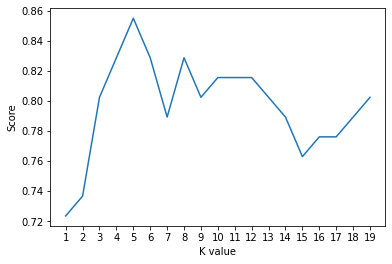

Maksimum nilai KNN adalah 85.53%


In [21]:
#Mencari nilai k yang terbaik
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maksimum nilai KNN adalah {:.2f}%".format(acc))

#**Matriks Konfusi KNN**

In [22]:
confusion_matrix(y_test,prediction)

array([[33,  6],
       [14, 23]])

Didapatkan 

- True Positif : 33
- True Negatif : 23
- False Positif : 6
- False Negatif : 14

[link text](https://)#Pemodelan NB
Model Naive Bayes

Ide Dasar

Naive Bayes Classifier adalah algoritme Machine Learning yang sangat populer berdasarkan teorema Bayes. Ini adalah algoritma sederhana namun sangat kuat yang bekerja dengan baik dengan kumpulan data besar, seperti data teks yang diproses sebelumnya yang membuat ribuan vektor tergantung pada jumlah kata dalam kamus. Ini bekerja sangat baik dengan proyek data teks seperti analisis data sentimen, berkinerja baik dengan proyek kategorisasi dokumen, dan juga bagus dalam memprediksi data kategorikal dalam proyek seperti klasifikasi spam email.

Terminologi Dasar

Menerapkan Persamaan Teorema Bayes dalam Algoritma Mari kita uraikan persamaan kita dan pahami cara kerjanya:

1. P(A|B) adalah probabilitas posterior kelas (target) yang diberikan prediktor (atribut).
2. P(B) adalah probabilitas kelas prior.
3. P(B|A) adalah kemungkinan yang merupakan probabilitas kelas prediktor yang diberikan.
4. P(A) adalah probabilitas prediktor sebelumnya.

Algoritma Naive Bayes

Pengklasifikasi Naive Bayes menghitung probabilitas suatu peristiwa dalam langkah-langkah berikut:

1. Hitung probabilitas prior untuk label kelas tertentu
2. Temukan probabilitas posterior dengan setiap atribut untuk setiap kelas
3. Masukkan nilai ini ke dalam Formula Bayes dan hitung probabilitas posterior.
4. Lihat kelas mana yang memiliki probabilitas lebih tinggi, mengingat input milik kelas probabilitas yang lebih tinggi

###Penyelesaian Scratch

In [24]:
# Membuat dataset klasifikasi
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [25]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(X_train, y_train)
nbtrain.class_count_

array([403., 397.])

In [26]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0])

In [27]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(X_test)

array([[9.98518992e-01, 1.48100831e-03],
       [2.47406667e-01, 7.52593333e-01],
       [9.98908511e-01, 1.09148939e-03],
       [7.50292241e-01, 2.49707759e-01],
       [9.52819658e-01, 4.71803419e-02],
       [1.01721314e-02, 9.89827869e-01],
       [9.94884330e-01, 5.11567036e-03],
       [4.30071836e-05, 9.99956993e-01],
       [3.24093406e-04, 9.99675907e-01],
       [9.91621982e-01, 8.37801843e-03],
       [3.81167130e-05, 9.99961883e-01],
       [9.61475050e-01, 3.85249496e-02],
       [5.63548021e-01, 4.36451979e-01],
       [9.98021470e-01, 1.97852997e-03],
       [1.83249894e-05, 9.99981675e-01],
       [6.89674257e-03, 9.93103257e-01],
       [1.09391298e-04, 9.99890609e-01],
       [9.92673527e-01, 7.32647331e-03],
       [9.69781051e-01, 3.02189485e-02],
       [9.89309184e-01, 1.06908162e-02],
       [6.08444246e-01, 3.91555754e-01],
       [8.22830902e-06, 9.99991772e-01],
       [5.38508540e-05, 9.99946149e-01],
       [9.96845567e-01, 3.15443296e-03],
       [9.917002

###Perhitungan Scikit Learn

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 96.50%


#Matriks Konfusi NB

In [29]:
confusion_matrix(y_test,y_pred)

array([[98,  1],
       [ 6, 95]])

Didapatkan 

- True Positif : 98
- True Negatif : 95
- False Positif : 1
- False Negatif : 6